# Cleaning and Wrangling Dataset

In [86]:
import pandas as pd
import numpy as np
from scipy import stats
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
#Viewing raw CSV file initially
players = pd.read_csv("players.csv")
players.head()

,index,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,...,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight
0,0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,...,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb
1,1,abdulza01,"April 7, 1946","Brooklyn, New York",1.2,42.8,NaN,72.8,505,15.1,...,5th overall,1st round,Cincinnati Royals,1968,6-9,"John Jay in Brooklyn, New York",Zaid Abdul-Aziz,Power Forward and Center,Right,235lb
2,2,abdulka01,"April 16, 1947","New York, New York",3.6,55.9,5.6,72.1,1560,24.6,...,1st overall,1st round,Milwaukee Bucks,1969,7-2,"Power Memorial in New York, New York",Kareem Abdul-Jabbar,Center,Right,225lb
3,3,abdulma02,"March 9, 1969","Gulfport, Mississippi",3.5,44.2,35.4,90.5,586,15.4,...,3rd overall,1st round,Denver Nuggets,1990,6-1,"Gulfport in Gulfport, Mississippi",Mahmoud Abdul-Rauf,Point Guard,Right,162lb
4,4,abdulta01,"November 3, 1974","Maisons Alfort, France",1.1,41.7,23.7,70.3,236,11.4,...,11th overall,1st round,Sacramento Kings,1997,6-6,"Lycee Aristide Briand in Evreux, France",Tariq Abdul-Wahad,Shooting Guard,Right,223lb


In [88]:
# dropping cols not important to analysis we are conducting
players = players.drop(['birthDate', 'birthPlace', 'college', 'draft_team', 'draft_year', 'height', 'draft_round',
                                    'highSchool', 'weight', 'shoots'], axis=1)
draft_pick = players.pop('draft_pick') #popping because want to implement at a later date
players.rename(columns={'_id':'player_id'}, inplace=True)
players.head()

,index,player_id,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,name,position
0,0,abdelal01,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,Alaa Abdelnaby,Power Forward
1,1,abdulza01,1.2,42.8,NaN,72.8,505,15.1,9.0,8.0,17.5,NaN,Zaid Abdul-Aziz,Power Forward and Center
2,2,abdulka01,3.6,55.9,5.6,72.1,1560,24.6,24.6,11.2,273.4,55.9,Kareem Abdul-Jabbar,Center
3,3,abdulma02,3.5,44.2,35.4,90.5,586,15.4,14.6,1.9,25.2,47.2,Mahmoud Abdul-Rauf,Point Guard
4,4,abdulta01,1.1,41.7,23.7,70.3,236,11.4,7.8,3.3,3.5,42.2,Tariq Abdul-Wahad,Shooting Guard


In [89]:
#Cleaning the position columns and dropping null values
players['position'] = players['position'].str.split(' and' )
player_positions = players.explode('position')
player_positions.dropna(inplace=True)
player_positions

,index,player_id,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,name,position
0,0,abdelal01,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,Alaa Abdelnaby,Power Forward
2,2,abdulka01,3.6,55.9,5.6,72.1,1560,24.6,24.6,11.2,273.4,55.9,Kareem Abdul-Jabbar,Center
3,3,abdulma02,3.5,44.2,35.4,90.5,586,15.4,14.6,1.9,25.2,47.2,Mahmoud Abdul-Rauf,Point Guard
4,4,abdulta01,1.1,41.7,23.7,70.3,236,11.4,7.8,3.3,3.5,42.2,Tariq Abdul-Wahad,Shooting Guard
5,5,abdursh01,2.5,47.2,29.7,81.0,830,19.0,18.1,7.5,71.2,47.9,Shareef Abdur-Rahim,Center
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4678,4678,zimmest01,0.2,32.3,-,60.0,19,7.3,1.2,1.8,0.0,32.3,Stephen Zimmerman,Center
4679,4679,zipsepa01,0.8,37.1,33.5,76.9,98,6.1,4.7,2.6,0.0,44.8,Paul Zipser,Small Forward
4680,4680,zizican01,0.6,58.3,-,70.8,91,17.5,6.4,4.2,3.0,58.3,Ante Zizic,Center
4681,4681,zoetji01,0.1,20.0,-,-,7,-0.8,0.3,1.1,-0.1,20.0,Jim Zoet,Center


In [90]:
#Viewing the raw salaries CSV file
salaries = pd.read_csv("salaries_1985to2018.csv")
salaries.head()

,index,league,player_id,salary,season,season_end,season_start,team
0,0,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers
1,1,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers
2,2,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics
3,3,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics
4,4,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings


In [91]:
# season category redundant, all leagues are also NBA (checked by value_counts()), so we can drop it too
salaries = salaries.drop(['league', 'season', 'season_end','index'], axis=1)
salaries['salary'] = salaries['salary'].astype(int)
salaries['season_start'] = pd.to_datetime(salaries['season_start'], format='%Y')
def normalize_by_year(x):
    # x is a DataFrame of group values
    x['salary'] /= x['salary'].max()
    return x
salaries = salaries.groupby('season_start', group_keys=False).apply(normalize_by_year)
salaries.rename(columns={'salary':'Normalized Salary'}, inplace=True)
salaries = salaries.groupby('player_id', group_keys=False)['Normalized Salary'].max()
salaries

/var/folders/z1/542vmcmd77n93176sv6nxkrw0000gn/T/ipykernel_77160/2606149918.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  salaries = salaries.groupby('season_start', group_keys=False).apply(normalize_by_year)


player_id
abdelal01    0.140244
abdulka01    0.923077
abdulma02    0.412238
abdulta01    0.243714
abdursh01    0.528046
               ...   
zidekge01    0.032205
zimmest01    0.030681
zipsepa01    0.037846
zizican01    0.047436
zubaciv01    0.037846
Name: Normalized Salary, Length: 2408, dtype: float64

In [92]:
historical = pd.merge(player_positions, salaries, how='right', on='player_id')
historical = historical.drop('index', axis=1)
historical

,player_id,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,name,position,Normalized Salary
0,abdelal01,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,Alaa Abdelnaby,Power Forward,0.140244
1,abdulka01,3.6,55.9,5.6,72.1,1560,24.6,24.6,11.2,273.4,55.9,Kareem Abdul-Jabbar,Center,0.923077
2,abdulma02,3.5,44.2,35.4,90.5,586,15.4,14.6,1.9,25.2,47.2,Mahmoud Abdul-Rauf,Point Guard,0.412238
3,abdulta01,1.1,41.7,23.7,70.3,236,11.4,7.8,3.3,3.5,42.2,Tariq Abdul-Wahad,Shooting Guard,0.243714
4,abdursh01,2.5,47.2,29.7,81.0,830,19.0,18.1,7.5,71.2,47.9,Shareef Abdur-Rahim,Center,0.528046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3336,zidekge01,0.2,40.8,25.0,78.3,135,8.7,3.4,2.1,0.8,40.9,George Zidek,Center,0.032205
3337,zimmest01,0.2,32.3,-,60.0,19,7.3,1.2,1.8,0.0,32.3,Stephen Zimmerman,Center,0.030681
3338,zipsepa01,0.8,37.1,33.5,76.9,98,6.1,4.7,2.6,0.0,44.8,Paul Zipser,Small Forward,0.037846
3339,zizican01,0.6,58.3,-,70.8,91,17.5,6.4,4.2,3.0,58.3,Ante Zizic,Center,0.047436


In [93]:
historical.head()
historical['position'] = historical['position'].astype('string')
historical['position'] = historical['position'].str.replace(r'\[|\]', '', regex=True)
historical['position'] = historical['position'].str.strip("'")
historical.head()

,player_id,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,name,position,Normalized Salary
0,abdelal01,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,Alaa Abdelnaby,Power Forward,0.140244
1,abdulka01,3.6,55.9,5.6,72.1,1560,24.6,24.6,11.2,273.4,55.9,Kareem Abdul-Jabbar,Center,0.923077
2,abdulma02,3.5,44.2,35.4,90.5,586,15.4,14.6,1.9,25.2,47.2,Mahmoud Abdul-Rauf,Point Guard,0.412238
3,abdulta01,1.1,41.7,23.7,70.3,236,11.4,7.8,3.3,3.5,42.2,Tariq Abdul-Wahad,Shooting Guard,0.243714
4,abdursh01,2.5,47.2,29.7,81.0,830,19.0,18.1,7.5,71.2,47.9,Shareef Abdur-Rahim,Center,0.528046


In [94]:
historical.dtypes

player_id                    object
career_AST                  float64
career_FG%                   object
career_FG3%                  object
career_FT%                   object
career_G                      int64
career_PER                   object
career_PTS                  float64
career_TRB                   object
career_WS                    object
career_eFG%                  object
name                         object
position             string[python]
Normalized Salary           float64
dtype: object

In [95]:
#Cleaning the data- adjusting dtypes to be workable
historical = historical[historical['career_FG%'] != '-']
historical['career_FG%'] = historical['career_FG%'].astype(float)

historical = historical[historical['career_FG3%'] != '-']
historical['career_FG3%'] = historical['career_FG3%'].astype(float)

historical = historical[historical['career_FT%'] != '-']
historical['career_FT%'] = historical['career_FT%'].astype(float)

historical = historical[historical['career_PER'] != '-']
historical['career_PER'] = historical['career_PER'].astype(float)

historical = historical[historical['career_PTS'] != '-']
historical['career_PTS'] = historical['career_PTS'].astype(float)
 
historical = historical[historical['career_WS'] != '-']
historical['career_WS'] = historical['career_WS'].astype(float)

historical = historical[historical['career_eFG%'] != '-']
historical['career_eFG%'] = historical['career_eFG%'].astype(float)

historical = historical[historical['career_TRB'] != '-']
historical['career_TRB'] = historical['career_TRB'].astype(float)

historical['player_id'] = historical['player_id'].astype('string')

historical['name'] = historical['name'].astype('string')
historical

/var/folders/z1/542vmcmd77n93176sv6nxkrw0000gn/T/ipykernel_77160/3666765689.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historical['career_FG%'] = historical['career_FG%'].astype(float)


,player_id,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,name,position,Normalized Salary
0,abdelal01,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,Alaa Abdelnaby,Power Forward,0.140244
1,abdulka01,3.6,55.9,5.6,72.1,1560,24.6,24.6,11.2,273.4,55.9,Kareem Abdul-Jabbar,Center,0.923077
2,abdulma02,3.5,44.2,35.4,90.5,586,15.4,14.6,1.9,25.2,47.2,Mahmoud Abdul-Rauf,Point Guard,0.412238
3,abdulta01,1.1,41.7,23.7,70.3,236,11.4,7.8,3.3,3.5,42.2,Tariq Abdul-Wahad,Shooting Guard,0.243714
4,abdursh01,2.5,47.2,29.7,81.0,830,19.0,18.1,7.5,71.2,47.9,Shareef Abdur-Rahim,Center,0.528046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3334,zellety01,0.9,50.9,28.6,76.4,412,14.9,7.0,4.4,17.1,51.1,Tyler Zeller,Center,0.258369
3335,zhizhwa01,0.3,41.7,38.5,73.5,137,14.2,4.4,1.7,2.1,48.5,Wang Zhizhi,Center,0.075397
3336,zidekge01,0.2,40.8,25.0,78.3,135,8.7,3.4,2.1,0.8,40.9,George Zidek,Center,0.032205
3338,zipsepa01,0.8,37.1,33.5,76.9,98,6.1,4.7,2.6,0.0,44.8,Paul Zipser,Small Forward,0.037846


# Linear Regression Model

In [96]:
#Data split into training, testing, and splitting sets
from sklearn.model_selection import train_test_split
data = historical.drop(['name','position','Normalized Salary','player_id'], axis=1)
target = historical['Normalized Salary']
train_data, test_data, train_target, test_target = train_test_split(
    data, target, test_size=0.7, random_state=999)

In [97]:
#Making linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

linear_model = LinearRegression()
linear_model.fit(X=train_data,y=train_target)
predicted = linear_model.predict(test_data)
baseline = np.full_like(predicted, fill_value=historical['Normalized Salary'].mean())

model_mse = mean_squared_error(test_target, predicted)
model_r2 = r2_score(test_target, predicted)
baseline_mse = mean_squared_error(test_target, baseline)
baseline_r2 = r2_score(test_target, baseline)

print(model_mse)
print(model_r2)
print(baseline_mse)
print(baseline_r2)

0.012897440627911197
0.7294937423074677
0.04768096336801353
-4.32904450560212e-05


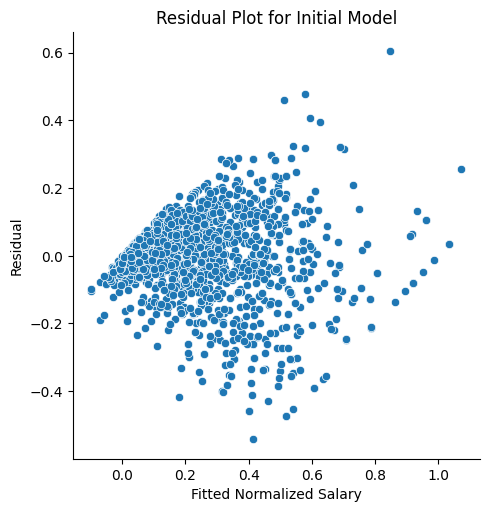

In [98]:
res1 = sns.relplot(x=predicted,y=predicted-test_target)
res1.set_xlabels('Fitted Normalized Salary')
res1.set_ylabels('Residual')
plt.title('Residual Plot for Initial Model')
plt.savefig('resplotinitialmodel')

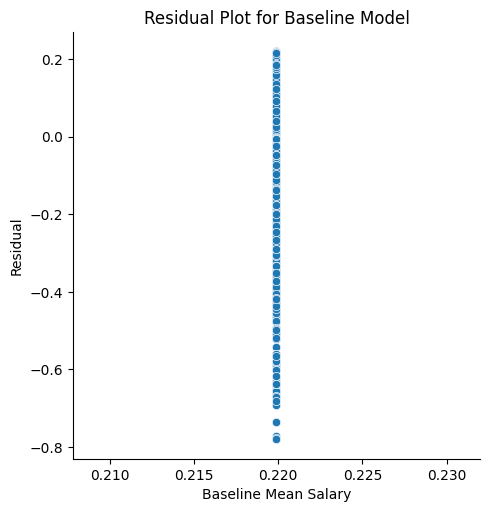

In [99]:
res2=sns.relplot(x=baseline,y=baseline-test_target)
res2.set_xlabels('Baseline Mean Salary')
res2.set_ylabels('Residual')
plt.title('Residual Plot for Baseline Model')
plt.savefig('resplotbaselinemodel')

# Analyzing Column Relations, Modifying Columns used in Model for Efficiency and Performance

In [100]:
data.corr()

,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%
career_AST,1.000000,0.080562,0.269010,0.340312,0.474214,0.466727,0.614642,0.161911,0.520551,0.157149
career_FG%,0.080562,1.000000,-0.152291,-0.069432,0.398400,0.673039,0.375162,0.567451,0.369751,0.850534
career_FG3%,0.269010,-0.152291,1.000000,0.367996,0.088830,0.104997,0.210979,-0.159343,0.077054,0.191855
career_FT%,0.340312,-0.069432,0.367996,1.000000,0.248695,0.261495,0.358580,-0.053245,0.222167,0.110823
career_G,0.474214,0.398400,0.088830,0.248695,1.000000,0.577950,0.673158,0.581918,0.835341,0.380414
career_PER,0.466727,0.673039,0.104997,0.261495,0.577950,1.000000,0.776489,0.659084,0.686166,0.645324
career_PTS,0.614642,0.375162,0.210979,0.358580,0.673158,0.776489,1.000000,0.628938,0.764257,0.404876
career_TRB,0.161911,0.567451,-0.159343,-0.053245,0.581918,0.659084,0.628938,1.000000,0.644314,0.423209
career_WS,0.520551,0.369751,0.077054,0.222167,0.835341,0.686166,0.764257,0.644314,1.000000,0.347371
career_eFG%,0.157149,0.850534,0.191855,0.110823,0.380414,0.645324,0.404876,0.423209,0.347371,1.000000


From above, we note that `career_eFG%` column was fairly correlated with `career_FG%`, and that `career_WS` and `career_G` were as well. Run a test making two more linear models to test how significant the predictive power of these two variables are

In [101]:
linear_model_2 = LinearRegression()
linear_model_2.fit(X=train_data.drop('career_eFG%', axis = 1),y=train_target)
predicted_2 = linear_model_2.predict(test_data.drop('career_eFG%', axis = 1))

model_mse_2 = mean_squared_error(test_target, predicted_2)
model_r2_2 = r2_score(test_target, predicted_2)

print(model_mse_2)
print(model_r2_2)

0.012889635792029005
0.729657438114047


In [102]:
cols = list(data.columns)
for col in cols:
    linear_model_2 = LinearRegression()
    linear_model_2.fit(X=train_data.drop(col, axis = 1),y=train_target)
    predicted_2 = linear_model_2.predict(test_data.drop(col, axis = 1))

    model_mse_2 = mean_squared_error(test_target, predicted_2)
    model_r2_2 = r2_score(test_target, predicted_2)

    print('Column dropped: ', col, '\nResulting MSE: ', model_mse_2, '\nResulting r^2: ', model_r2_2, "\n")

Column dropped:  career_AST 
Resulting MSE:  0.012846146462749597 
Resulting r^2:  0.7305695675862676 

Column dropped:  career_FG% 
Resulting MSE:  0.013057785685721957 
Resulting r^2:  0.7261307230248655 

Column dropped:  career_FG3% 
Resulting MSE:  0.012891441347905366 
Resulting r^2:  0.7296195690377505 

Column dropped:  career_FT% 
Resulting MSE:  0.012943359870328776 
Resulting r^2:  0.7285306487154278 

Column dropped:  career_G 
Resulting MSE:  0.01337235602090721 
Resulting r^2:  0.7195330385224148 

Column dropped:  career_PER 
Resulting MSE:  0.012915694877614074 
Resulting r^2:  0.7291108842725623 

Column dropped:  career_PTS 
Resulting MSE:  0.013624921567932402 
Resulting r^2:  0.7142358200339651 

Column dropped:  career_TRB 
Resulting MSE:  0.013592762198182824 
Resulting r^2:  0.7149103190304469 

Column dropped:  career_WS 
Resulting MSE:  0.013773678315077186 
Resulting r^2:  0.7111158497904451 

Column dropped:  career_eFG% 
Resulting MSE:  0.012889635792029005 

From results above with comparison of MSE/r^2 values relative to original model, we decided to drop the `career_eFG%` column as it was not significantly predictive and given that it is significantly correlated with `career_eFG%`. Furthermore, after analyzing our previous columns dropped, we want to test if the `draft_pick` would help improve our models accuracy from here. So, we will add that as a column. Finally, we determined that removing the `career_AST` column actually improve the performance of our model, so we will move forward without this column as well.

In [103]:
data.drop(['career_eFG%', 'career_AST'], axis = 1, inplace = True)
data = data.join(draft_pick)
data['draft_pick'] = data['draft_pick'].str.extract('(^\d+)')
data['draft_pick'] = data['draft_pick'].astype(float)
data.dtypes
data['draft_pick'].notnull().sum()


2177

The `draft_pick` column unfortuantely has too many NaNs that it would filter out a significant portion of the data we have left. We will just have to exclude this.

In [104]:
data.drop('draft_pick', axis = 1, inplace=True)

# Linear Regression Finalized Model

In [105]:
train_data, test_data, train_target, test_target = train_test_split(
    data, target, test_size=0.7, random_state=999)

In [106]:
linear_model_f = LinearRegression()
linear_model_f.fit(X=train_data,y=train_target)
predicted_f = linear_model_f.predict(test_data)

model_mse_f = mean_squared_error(test_target, predicted_f)
model_r2_f = r2_score(test_target, predicted_f)

print('Resulting MSE: ', model_mse_f, '\nResulting r^2: ', model_r2_f, "\n")

Resulting MSE:  0.01283851921567998 
Resulting r^2:  0.7307295387092849 



# Polynomial Regression

We feel we have thusfar reached the limit of our linear regression model's capabilities with the data we have. So, we feel that we should now try a polynomial regression to explore how our predicitons are affected by this.

In [107]:
from sklearn.preprocessing import PolynomialFeatures
poly_data_train = PolynomialFeatures(2, include_bias=False).fit_transform(train_data)
poly_data_test = PolynomialFeatures(2, include_bias=False).fit_transform(test_data)

quadratic_model = LinearRegression()
quadratic_model.fit(X=poly_data_train, y = train_target)
predicted_quad = quadratic_model.predict(poly_data_test)

model_mse_quad = mean_squared_error(test_target, predicted_quad)
model_r2_quad = r2_score(test_target, predicted_quad)
print('Resulting MSE: ', model_mse_quad, '\nResulting r^2: ', model_r2_quad, "\n")

Resulting MSE:  0.011491114551479081 
Resulting r^2:  0.7589895170899319 



In [108]:
cubic_data_train = PolynomialFeatures(3, include_bias=False).fit_transform(train_data)
cubic_data_test = PolynomialFeatures(3, include_bias=False).fit_transform(test_data)

cubic_model = LinearRegression()
cubic_model.fit(X=cubic_data_train, y = train_target)
predicted_cubic = cubic_model.predict(cubic_data_test)

model_mse_cubic = mean_squared_error(test_target, predicted_cubic)
model_r2_cubic = r2_score(test_target, predicted_cubic)
print('Resulting MSE: ', model_mse_cubic, '\nResulting r^2: ', model_r2_cubic, "\n")

Resulting MSE:  0.019707088459877415 
Resulting r^2:  0.5866706501629002 



Text(0.5, 1.0, 'Residual Plot for Initial Model')

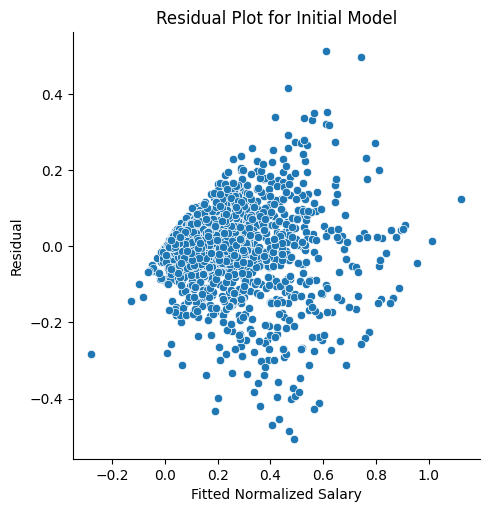

In [109]:
res2 = sns.relplot(x=predicted_quad,y=predicted_quad-test_target)
res2.set_xlabels('Fitted Normalized Salary')
res2.set_ylabels('Residual')
plt.title('Residual Plot for Initial Model')
# plt.savefig('resplotinitialmodel')

From above, we note that a quadratic fit produced the best results. To verify this, we will run a r-fold cross validation to get a better picture of our MSE and r^2 across our data.

# KNN Classifier for Salary Level

We will define a new descriptor based on salary level. This will allow us to see if our data is better suited for classification rather than regression.

In [110]:
stats = historical['Normalized Salary'].describe()
conditions = [
    (historical['Normalized Salary'] < stats['25%']),
    (historical['Normalized Salary'] >= stats['25%']) & (historical['Normalized Salary'] < stats['50%']),
    (historical['Normalized Salary'] >= stats['50%']) & (historical['Normalized Salary'] < stats['75%']),
    (historical['Normalized Salary'] >= stats['75%'])
]
values = ['Rookie', 'Low', 'Middle', 'High']
historical['Salary_Level'] = np.select(conditions, values)
historical


,player_id,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,name,position,Normalized Salary,Salary_Level
0,abdelal01,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,Alaa Abdelnaby,Power Forward,0.140244,Low
1,abdulka01,3.6,55.9,5.6,72.1,1560,24.6,24.6,11.2,273.4,55.9,Kareem Abdul-Jabbar,Center,0.923077,High
2,abdulma02,3.5,44.2,35.4,90.5,586,15.4,14.6,1.9,25.2,47.2,Mahmoud Abdul-Rauf,Point Guard,0.412238,High
3,abdulta01,1.1,41.7,23.7,70.3,236,11.4,7.8,3.3,3.5,42.2,Tariq Abdul-Wahad,Shooting Guard,0.243714,Middle
4,abdursh01,2.5,47.2,29.7,81.0,830,19.0,18.1,7.5,71.2,47.9,Shareef Abdur-Rahim,Center,0.528046,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3334,zellety01,0.9,50.9,28.6,76.4,412,14.9,7.0,4.4,17.1,51.1,Tyler Zeller,Center,0.258369,Middle
3335,zhizhwa01,0.3,41.7,38.5,73.5,137,14.2,4.4,1.7,2.1,48.5,Wang Zhizhi,Center,0.075397,Low
3336,zidekge01,0.2,40.8,25.0,78.3,135,8.7,3.4,2.1,0.8,40.9,George Zidek,Center,0.032205,Rookie
3338,zipsepa01,0.8,37.1,33.5,76.9,98,6.1,4.7,2.6,0.0,44.8,Paul Zipser,Small Forward,0.037846,Rookie


In [127]:
from sklearn.preprocessing import StandardScaler
data = StandardScaler().fit_transform(data)
target_class = historical['Salary_Level']
train_data, test_data, train_target, test_target = train_test_split(
    data, target_class, test_size=0.7, random_state=212)

In [129]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

params_to_try = {'n_neighbors': range(1,30)}
knn_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params_to_try)
knn_search.fit(train_data, train_target)
print(knn_search.best_params_)
print('Accuracy on Training Data: ', knn_search.score(train_data, train_target))
print('Accuracy on Testing Data: ', knn_search.score(test_data, test_target))

{'n_neighbors': 23}
Accuracy on Training Data:  0.6446370530877573
Accuracy on Testing Data:  0.6183844011142061


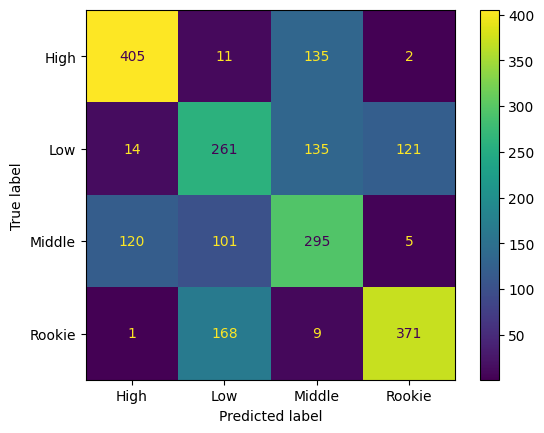

In [131]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

predicted_classifier = knn_search.predict(test_data)
cm2 = metrics.confusion_matrix(y_true=test_target, y_pred=predicted_classifier, labels = knn_search.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=knn_search.classes_)
disp2.plot()
plt.grid(False)